
#**Project Title:**


#                  **Cyber Security Intrusion Detection Systems : Comparative analysis on ML classification and Neural Networks**

#Author

**Author Name:** Benita Ashley

**Student ID:** 220058151

# Project Supervisor

**Name:** Dr Mahdieh Sadabadi

**1. Importing Required Libraries**

In [15]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

**2. Reading the datset and displaying the same**

In [16]:
traindata = pd.read_csv('KDDCup99_Train.csv')
testdata = pd.read_csv('KDDCup99_Test.csv')

In [17]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


**3. Pre-processing data for the model**

In [18]:
categ = ['protocol_type','service','flag']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [19]:
labels=[]
for i in data['labels']:
    if i=='normal':
        labels.append(0)
    else:
        labels.append(1)
data['labels']=labels

In [20]:
X = data.iloc[:,1:41]
Y = data['labels']

In [21]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [23]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [24]:
X_train.shape

(118813, 40, 1)

**4. Convolutional Neural Network with Long-Short Term Memory Model**

In [25]:
cnn = Sequential()
cnn.add(Convolution1D(128 ,3,activation="relu",input_shape=(40, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(LSTM(70,activation="relu"))
cnn.add(Flatten())
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation="sigmoid"))

In [26]:
# define optimizer and objective, compile cnn

cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

In [27]:
history=cnn.fit(X_train, Y_train, epochs=75,verbose=1,batch_size=500,validation_data=(X_test, Y_test))

Epoch 1/75
238/238 [==============================] - 39s 158ms/step - loss: 0.3432 - accuracy: 0.8575 - val_loss: 0.2448 - val_accuracy: 0.8867
Epoch 2/75
238/238 [==============================] - 39s 165ms/step - loss: 0.2235 - accuracy: 0.9042 - val_loss: 0.2059 - val_accuracy: 0.9208
Epoch 3/75
238/238 [==============================] - 39s 163ms/step - loss: 0.1873 - accuracy: 0.9240 - val_loss: 0.1647 - val_accuracy: 0.9308
Epoch 4/75
238/238 [==============================] - 36s 151ms/step - loss: 0.1669 - accuracy: 0.9318 - val_loss: 0.1636 - val_accuracy: 0.9317
Epoch 5/75
238/238 [==============================] - 37s 156ms/step - loss: 0.1579 - accuracy: 0.9360 - val_loss: 0.1437 - val_accuracy: 0.9419
Epoch 6/75
238/238 [==============================] - 37s 157ms/step - loss: 0.1459 - accuracy: 0.9407 - val_loss: 0.1324 - val_accuracy: 0.9430
Epoch 7/75
238/238 [==============================] - 37s 157ms/step - loss: 0.1355 - accuracy: 0.9469 - val_loss: 0.1156 - val_ac

**5. Model Accuracy and Loss**

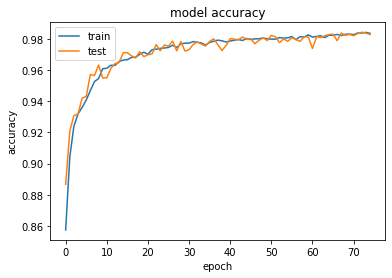

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

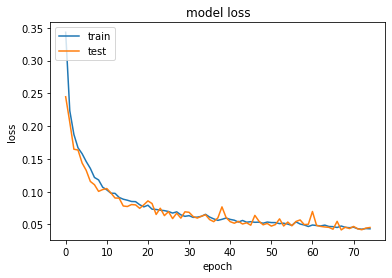

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
cnn.save("./cnn_lstm_model.hdf5")